<h1 style="color:rgb(0,120,170)">Assignment 8</h1>

<h2 style="color:rgb(210,90,80)">Topic: Maximum-A-Posteriori (MAP) Estimation and Ridge Regression</h2>
<h2 style="color:rgb(0,120,170)">Machine Learning: Theoretical Concepts, SS 2019</h2>

<h3 style="color:rgb(0,120,170)">Deadline: June 12th 2019, 24:00</h3>

Return this notebook with your code and answers.

<h3 style="color:rgb(0,120,170)">Question 8.1 (50 Points):</h3>

Consider a regression task for training data $\{ \mathbf{z} \} = \{ \mathbf{z}_1,\mathbf{z}_2,...,\mathbf{z}_n \}$, $\mathbf{z}_i = (\mathbf{x}_i,y_i)$, with data $\mathbf{x}_i \in \mathbb{R}^m$ and labels $y_i$. We assume Gaussian target noise with zero mean and variance $\sigma^2$:

$$
y_i = \mathbf{w}^\text{T}\mathbf{x}_i + \epsilon_i, \quad \epsilon_i \sim \mathcal{N}(0,\sigma^2),
$$

where $\mathbf{w}$ is the parameter vector. The likelihood of data $\mathbf{z}$ to be produced by the model is

$$
p(\{\mathbf{z}\}|\mathbf{w}) = \prod_{i=1}^n p(z_i|\mathbf{w})
                             = \prod_{i=1}^n p(\mathbf{x}_i,y_i|\mathbf{w})
                             = \prod_{i=1}^n p(y_i|\mathbf{x}_i,\mathbf{w})\ p(\mathbf{x}_i).
$$

The expression $p(y_i|\mathbf{x}_i,\mathbf{w})$ is the probability of the response $y_i$, given input vector $\mathbf{x}_i$ and parameter vector $\mathbf{w}$. Since $y_i - \mathbf{w}^\text{T}\mathbf{x}_i =  \epsilon_i$, this is just the probability density function of $\mathcal{N}(0,\sigma^2)$ evaluated at the difference $\epsilon_i$:

$$
p(\{\mathbf{z}\}|\mathbf{w}) = \prod_{i=1}^n p(y_i|\mathbf{x}_i,\mathbf{w})\ p(\mathbf{x}_i)
                             = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}}\ \text{exp}\Bigl\lbrack -\frac{(y_i-\mathbf{w}^\text{T}\mathbf{x}_i)^2}{2\sigma^2} \Bigr\rbrack\ p(\mathbf{x}_i).
$$

Now we assume a Gaussian prior with mean $\mathbf{\mu} = \mathbf{0} \in \mathbb{R}^n$ on $\mathbf{w} \in \mathbb{R}^n$ with unknown but fixed $\sigma_{\mathbf{w}}^2$, i.e.

$$
p(w) = \mathcal{N}(\mathbf{0},\sigma_{\mathbf{w}}\mathbf{I}) = \frac{1}{(2\pi\sigma_{\mathbf{w}}^2)^{n/2}}\, \text{exp}\Bigl\lbrack -\frac{\mathbf{w}^\text{T}\mathbf{w}}{2\sigma_{\mathbf{w}}^2} \Bigr\rbrack,
$$

where $\mathbf{I}$ is the identity matrix.

Show that when we do Maximum-A-Posteriori (MAP) estimation, we obtain the optimization objective (loss function) of linear regression with $L_2$ weight decay. Also, try to find an expression which is equivalent to the hyperparameter $\lambda$ that is controlling the influence of weight decay. Find an interpretation of this expression.

* <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(210,90,80)">Answer 8.1:</h3>

We want to show:

\begin{align*}
w_{MAP} = argmax_w p(w | \{z\})
\end{align*}

$w_{MAP}$ is equal to the optimization objective of linear regression with $L_2$ weight decay: 

\begin{align*}
argmin_w \big( \sum_i^n (g(x_i; w) - y_i)^2 + \lambda ||w||^2 \big)
\end{align*}

We show this with the following equation: 

\begin{align*}
w_{MAP} &= argmax_w p(w | \{z\}) \\
&= argmin_w \big( - \ln(p(\{z\} | w)) - \ln(p(w)) + \underbrace{\ln(p(\{z\}))}_\text{does not depend on $argmin_w$}  \big) \\
&= argmin_w \big(- \sum_i^n \ln \big( \frac{1}{\sqrt{2\pi\sigma^2}}\ \text{exp}\Bigl\lbrack -\frac{(y_i-\mathbf{w}^\text{T}\mathbf{x}_i)^2}{2\sigma^2} \Bigr\rbrack\ p(\mathbf{x}_i) \big) - \ln \big( \frac{1}{(2\pi\sigma_{\mathbf{w}}^2)^{n/2}}\, \text{exp}\Bigl\lbrack -\frac{\mathbf{w}^\text{T}\mathbf{w}}{2\sigma_{\mathbf{w}}^2} \Bigr\rbrack\big) \big) \\
&= argmin_w \big(- \sum_i^n \big( \ln \frac{1}{\sqrt{2\pi\sigma^2}} + \ln \text{exp}\Bigl\lbrack -\frac{(y_i-\mathbf{w}^\text{T}\mathbf{x}_i)^2}{2\sigma^2} \Bigr\rbrack\ + \ln p(\mathbf{x}_i) \big) - \ln \frac{1}{(2\pi\sigma_{\mathbf{w}}^2)^{n/2}} - \ln \text{exp}\Bigl\lbrack -\frac{\mathbf{w}^\text{T}\mathbf{w}}{2\sigma_{\mathbf{w}}^2} \Bigr\rbrack \big) \\
&= argmin_w \big(- \sum_i^n \big( \underbrace{\ln \frac{1}{\sqrt{2\pi\sigma^2}}}_\text{constant wrt. w}  -\frac{(y_i-\mathbf{w}^\text{T}\mathbf{x}_i)^2}{2\sigma^2} + \underbrace{\ln p(\mathbf{x}_i)}_\text{constant wrt. w} \big) - \underbrace{\ln \frac{1}{(2\pi\sigma_{\mathbf{w}}^2)^{n/2}}}_\text{constant wrt. w} + \frac{\mathbf{w}^\text{T}\mathbf{w}}{2\sigma_{\mathbf{w}}^2} \big) \\
&= argmin_w \big(- \sum_i^n -\frac{(y_i-\mathbf{w}^\text{T}\mathbf{x}_i)^2}{2\sigma^2} + \frac{\mathbf{w}^\text{T}\mathbf{w}}{2\sigma_{\mathbf{w}}^2} \big) \\
&= argmin_w \big(\sum_i^n \frac{(y_i-\mathbf{w}^\text{T}\mathbf{x}_i)^2}{2\sigma^2} + \frac{\mathbf{w}^\text{T}\mathbf{w}}{2\sigma_{\mathbf{w}}^2} \big) \\
&= argmin_w \big(\frac{1}{2\sigma^2} \sum_i^n  (y_i-\mathbf{w}^\text{T}\mathbf{x}_i)^2 + \frac{1}{2\sigma^2_w} ||w||^2 \big)
\end{align*}

Introducing 

\begin{align*}
\alpha &= \frac{1}{\sigma^2_w} \\
\lambda &= \sigma^2 \alpha
\end{align*}

\begin{align*}
argmin_w \big(\frac{1}{2\sigma^2} \sum_i^n  (y_i-\mathbf{w}^\text{T}\mathbf{x}_i)^2 + \frac{1}{2\sigma^2_w} ||w||^2 \big) &= argmin_w \big( \frac{1}{2\sigma^2} \sum_i^n  (y_i-\mathbf{w}^\text{T}\mathbf{x}_i)^2 + \frac{1}{2}\alpha ||w||^2 \big) \\
&= argmin_w \big( \sum_i^n  (y_i-\mathbf{w}^\text{T}\mathbf{x}_i)^2 + \lambda ||w||^2 \big) \\
&= w_{MAP}
\end{align*}

<h3 style="color:rgb(0,120,170)">Question 8.2 (50 Points):</h3>

Ridge Regression:

Given a set of noisy data, we can try to fit the data with polynomials of different degrees. We use degrees 1 to 15.

* Using the code below, which polynomial degree gives the "best fit", i.e. the smallest residual sum of squares (RSS)?
* Looking at the plots, is this really the "best fit" in the sense of the most reasonable model for the data? Which type of problem are you actually observing? Which polynomial degree actually seems to give a decent fit for the data?
* What is the structure of the table of coefficients (weights)? Which coeffiecients are large? What would happen to the coefficients if you allowed even larger polynomial degrees?

Using the regression for polynmial degree 15, we now apply ridge regression ($L_2$ regularization, $L_2$ weight decay) for various values of the parameter ``alpha`` (called $\lambda$ in question 8.1).

* Complete the code for ridge regression between "# to do" and "# end to do".
* Looking at the plots, how do the results behave for very small values of ``alpha`` and very large values of ``alpha``? Which ``alpha`` would you consider a suitable choice?
* Looking at the table of coefficients (weights), what do you observe?


* <span style="color:rgb(0,120,170)">**TODO:** Code, Markdown</span>

<h3 style="color:rgb(210,90,80)">Answer 8.2:</h3>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.3g}'.format  # write numbers in scientfic format

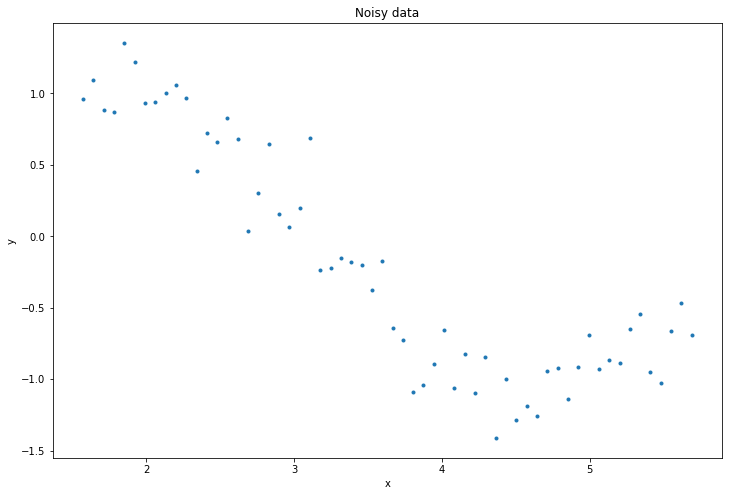

In [2]:
# define input data: part of sine function with random noise
x = np.array([i * np.pi / 180 for i in range(90, 330, 4)])
np.random.seed(12345)
y = np.sin(x) + np.random.normal(0, 0.2, len(x))
data = pd.DataFrame(np.column_stack([x, y]), columns=['x', 'y'])

# plot input data
plt.figure(figsize=[12, 8])
plt.plot(data['x'], data['y'], '.')
plt.title("Noisy data")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
# expand data with powers of x up to x^15

max_degree = 15
for i in range(2, max_degree + 1):
    colname = 'x_%d' % i
    data[colname] = data['x']**i
print(data.head())

     x     y  x_2  x_3  x_4  x_5  x_6  x_7  x_8  x_9  x_10  x_11     x_12  \
0 1.57 0.959 2.47 3.88 6.09 9.56   15 23.6 37.1 58.2  91.5   144      226   
1 1.64  1.09 2.69 4.42 7.24 11.9 19.5   32 52.5 86.1   141   232      380   
2 1.71 0.886 2.93    5 8.56 14.6   25 42.8 73.3  125   214   367      627   
3 1.78 0.867 3.17 5.64   10 17.9 31.8 56.7  101  180   320   569 1.01e+03   
4 1.85  1.35 3.42 6.33 11.7 21.7 40.1 74.2  137  254   470   869 1.61e+03   

      x_13     x_14     x_15  
0      354      557      875  
1      624 1.02e+03 1.68e+03  
2 1.07e+03 1.83e+03 3.14e+03  
3  1.8e+03 3.21e+03 5.72e+03  
4 2.97e+03  5.5e+03 1.02e+04  


In [4]:
# linear regression

from sklearn.linear_model import LinearRegression
def linear_regression(data, max_degree):
    
    list_of_predictors = []                             # create empty list of predictors
    list_of_coefficients = []                           # create empty list of coefficients
    predictors=['x']
    for degree in range(1, max_degree+1):               # create predictions for all polynomials with degrees 1 to max_degree
    
        if degree >=2:                                  # extend predictors with higher powers of x
            predictors.extend(['x_{}'.format(degree)])

        lin_reg = LinearRegression(normalize=True)      # linear regression
        lin_reg.fit(data[predictors],data['y'])
        y_pred = lin_reg.predict(data[predictors])
        list_of_predictors.append(y_pred)
        
        rss = sum((y_pred-data['y'])**2)                # residual sum of squares
        result = [rss]
        result.extend([lin_reg.intercept_])             # intercept, i.e. coeff. of x^0
        result.extend(lin_reg.coef_)                    # coefficents
        list_of_coefficients.append(result)
    
    return list_of_predictors, list_of_coefficients     # return predictors and coefficients (including rss)

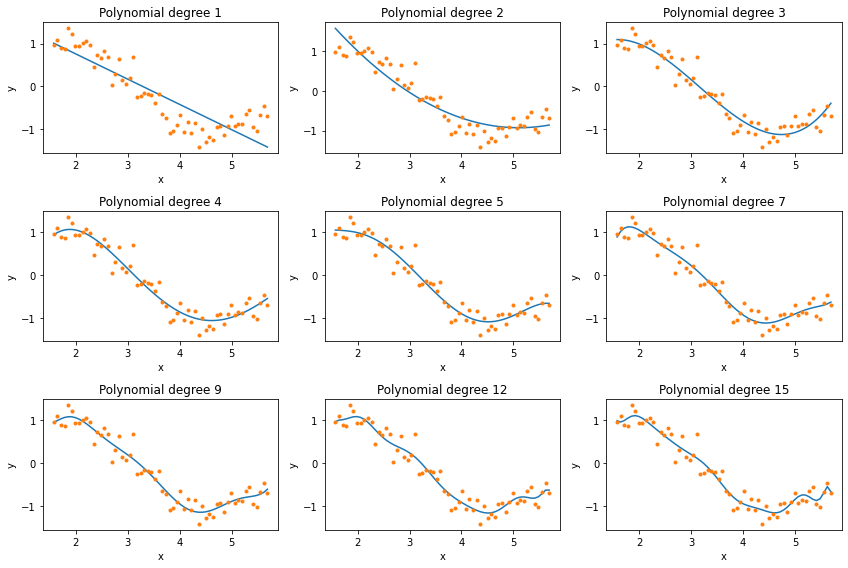

In [5]:
# plot linear regression results for a set of polynomial degrees from 1 to 15

degrees = [1, 2, 3, 4, 5, 7, 9, 12, 15]
list_of_predictors, list_of_coefficients = linear_regression(data, max_degree)
plt.figure(figsize=[12, 8])
for i, degree in enumerate(degrees):
    plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    plt.plot(data['x'], list_of_predictors[degree - 1])
    plt.plot(data['x'], data['y'], '.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Polynomial degree {}'.format(degree))

In [6]:
# print list of coefficients

col = ['RSS', 'Coeff. of x^0'
       ] + ['Coeff. of x^{}'.format(i) for i in range(1, max_degree + 1)]
ind = ['Polynomial degree {}'.format(i) for i in range(1, max_degree + 1)]
coeff_table = pd.DataFrame(index=ind, columns=col)
for i, entry in enumerate(list_of_coefficients):
    coeff_table.iloc[i, 0:i + 3] = entry

coeff_table

,RSS,Coeff. of x^0,Coeff. of x^1,Coeff. of x^2,Coeff. of x^3,Coeff. of x^4,Coeff. of x^5,Coeff. of x^6,Coeff. of x^7,Coeff. of x^8,Coeff. of x^9,Coeff. of x^10,Coeff. of x^11,Coeff. of x^12,Coeff. of x^13,Coeff. of x^14,Coeff. of x^15
Polynomial degree 1,9.1,1.93,-0.588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polynomial degree 2,5.04,4.26,-2.03,0.199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polynomial degree 3,2.73,-1.16,3.19,-1.34,0.142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polynomial degree 4,2.49,-6.63,10.3,-4.62,0.773,-0.0435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polynomial degree 5,2.37,5.17,-9.06,7.5,-2.84,0.473,-0.0285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polynomial degree 6,2.33,-16.9,34.7,-27.1,11.2,-2.63,0.324,-0.0162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polynomial degree 7,2.24,-123,280,-262,132,-38.9,6.65,-0.613,0.0235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polynomial degree 8,2.21,69.7,-231,313,-227,97.7,-25.7,4.05,-0.352,0.0129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polynomial degree 9,2.2,348,-1.06e+03,1.39e+03,-1.02e+03,463,-135,25.5,-2.99,0.198,-0.00566,NaN,NaN,NaN,NaN,NaN,NaN
Polynomial degree 10,2.19,1.85e+03,-6.07e+03,8.71e+03,-7.21e+03,3.83e+03,-1.36e+03,329,-53.5,5.6,-0.342,0.00927,NaN,NaN,NaN,NaN,NaN


In [7]:
# ridge regression

from sklearn.linear_model import Ridge


def ridge_regression(data, max_degree, alpha_ridge):
    list_of_predictors = []
    list_of_coefficients = []

    predictors = ['x']
    for degree in range(2, max_degree + 1):
        predictors.extend(['x_{}'.format(degree)])

    for alpha in alpha_ridge:
        # to do
        X = data[predictors]
        y = data['y']

        r = Ridge(alpha, normalize=True).fit(X, y)
        y_pred = r.predict(X)
        list_of_predictors.append(y_pred)

        result = [np.sum((y - y_pred)**2)]
        result.extend([r.intercept_])
        result.extend(r.coef_)
        list_of_coefficients.append(result)
        # end to do

    return list_of_predictors, list_of_coefficients

C:\Users\steve\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.63283e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


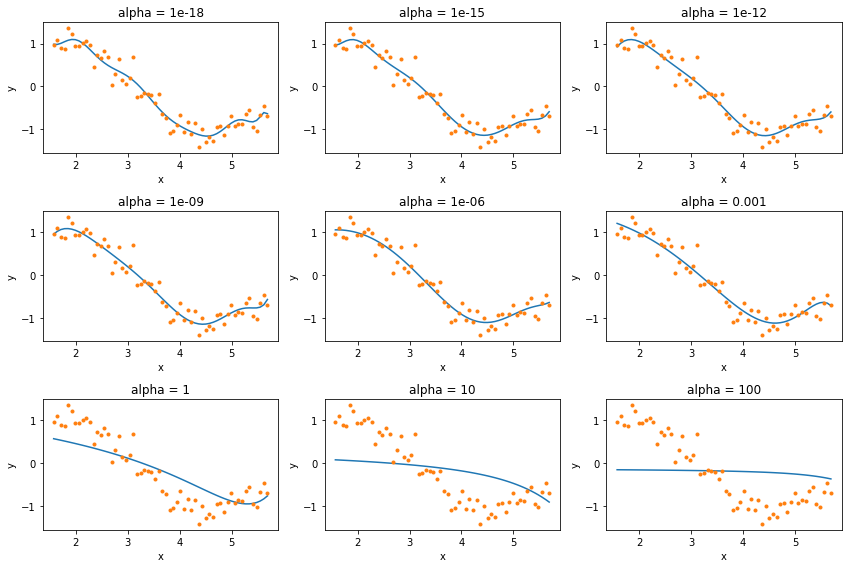

In [8]:
# plot ridge regression results for max_degree and a set of values for alpha

alpha_ridge = [1e-18, 1e-15, 1e-12, 1e-9, 1e-6, 1e-3, 1, 10, 100]
list_of_predictors_ridge, list_of_coefficients_ridge = ridge_regression(data,max_degree,alpha_ridge)
plt.figure(figsize=[12,8])
for i,alpha in enumerate(alpha_ridge):
    # plot
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.plot(data['x'],list_of_predictors_ridge[i])
    plt.plot(data['x'],data['y'],'.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('alpha = %.3g'%alpha)

In [9]:
# print list of coefficients

col = ['RSS','Coeff. of x^0'] + ['Coeff. of x^{}'.format(i) for i in range(1,max_degree+1)]
ind = ['alpha: {}'.format(alpha_ridge[i-1]) for i in range(1,len(alpha_ridge)+1)]
coeff_table_ridge = pd.DataFrame(index=ind, columns=col)
for i,entry in enumerate(list_of_coefficients_ridge):
    coeff_table_ridge.iloc[i,0:max_degree+2] = entry

coeff_table_ridge

,RSS,Coeff. of x^0,Coeff. of x^1,Coeff. of x^2,Coeff. of x^3,Coeff. of x^4,Coeff. of x^5,Coeff. of x^6,Coeff. of x^7,Coeff. of x^8,Coeff. of x^9,Coeff. of x^10,Coeff. of x^11,Coeff. of x^12,Coeff. of x^13,Coeff. of x^14,Coeff. of x^15
alpha: 1e-18,2.11,-2.42e+03,9.39e+03,-1.56e+04,1.45e+04,-8.07e+03,2.66e+03,-421,-17.4,16.7,-0.732,-0.556,0.0601,0.0167,-0.00463,0.000434,-1.49e-05
alpha: 1e-15,2.18,637,-1.87e+03,2.28e+03,-1.48e+03,529,-86.8,-2.93,2.91,-0.0618,-0.0767,-0.000159,0.00236,8.42e-05,-0.000105,1.31e-05,-5.27e-07
alpha: 1e-12,2.21,-8.74,0.0704,20.2,-18.2,5.85,-0.379,-0.143,0.00795,0.00422,0.000125,-9.6e-05,-1.19e-05,1.35e-06,3.52e-07,-3.55e-08,6.58e-11
alpha: 1e-09,2.22,-18.8,31.6,-17.2,3.19,0.175,-0.0694,-0.011,0.000388,0.000359,5.2e-05,-3.11e-07,-1.5e-06,-2.63e-07,-1.82e-10,7.77e-09,-2.53e-10
alpha: 1e-06,2.32,0.0753,1.18,-0.34,-0.00339,-0.00215,-0.000977,-6.8e-05,3.64e-05,1.39e-05,2.58e-06,2.18e-07,-3.4e-08,-1.82e-08,-3.88e-09,-2.87e-10,1.53e-10
alpha: 0.001,2.55,1.51,-0.00106,-0.0983,-0.016,-0.00146,1.29e-05,4.01e-05,1.1e-05,2.14e-06,3.42e-07,4.45e-08,4.07e-09,-3.18e-11,-1.38e-10,-4.57e-11,-1.13e-11
alpha: 1,11,0.899,-0.171,-0.0187,-0.00236,-0.000297,-3.5e-05,-3.64e-06,-2.69e-07,6.87e-09,9.11e-09,2.75e-09,6.49e-10,1.38e-10,2.78e-11,5.38e-12,1.02e-12
alpha: 10,26.1,0.156,-0.0387,-0.00464,-0.000664,-9.86e-05,-1.47e-05,-2.2e-06,-3.28e-07,-4.87e-08,-7.17e-09,-1.05e-09,-1.52e-10,-2.16e-11,-3.02e-12,-4.1e-13,-5.32e-14
alpha: 100,36.4,-0.14,-0.00548,-0.000692,-0.000105,-1.68e-05,-2.71e-06,-4.43e-07,-7.27e-08,-1.2e-08,-1.99e-09,-3.31e-10,-5.53e-11,-9.27e-12,-1.56e-12,-2.63e-13,-4.46e-14


<h3 style="color:rgb(210,90,80)">Answer 8.2:</h3>

* Using the code below, which polynomial degree gives the "best fit", i.e. the smallest residual sum of squares (RSS)?

The highest degree, since it has the most freedom to fit every datapoint as closely as possible

* Looking at the plots, is this really the "best fit" in the sense of the most reasonable model for the data? Which type of problem are you actually observing? Which polynomial degree actually seems to give a decent fit for the data?

No, of course not. The problem, in this case, is that the polynomial is clearly overfitting the observed data.
A polynomial of degree 4 seems to work best on the data (3, 5 are also reasonably well).

* What is the structure of the table of coefficients (weights)? Which coeffiecients are large? What would happen to the coefficients if you allowed even larger polynomial degrees?

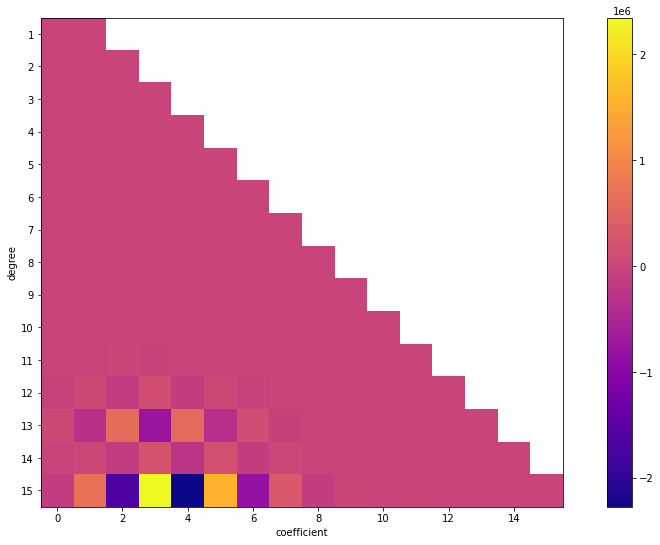

In [10]:
plt.figure(figsize=(16, 9))
cbar = plt.imshow(coeff_table.values.astype(float)[:, 1:], cmap=plt.get_cmap('plasma'))
plt.colorbar(cbar)
plt.xlabel('coefficient')
plt.ylabel('degree')
plt.yticks(range(15), range(1, 16))
plt.show()

We can see that coeffcients start getting extremely big for degree 15 alone. The smaller coefficients around the best fitting one (=4) tend to be the highest (almost negatively binomially distributed around 4). This trend would accelerate for higher degrees

* Complete the code for ridge regression between "# to do" and "# end to do".

DONE

* Looking at the plots, how do the results behave for very small values of ``alpha`` and very large values of ``alpha``? Which ``alpha`` would you consider a suitable choice?

For (too) small alpha, the regression overfits to every datapoint. (High weights are not punished enough)

For (too) big alpha, the regression underfits the data. (Weights are not high enough)

For this regression task `alpha ~= 1e-6` seems to work best. 

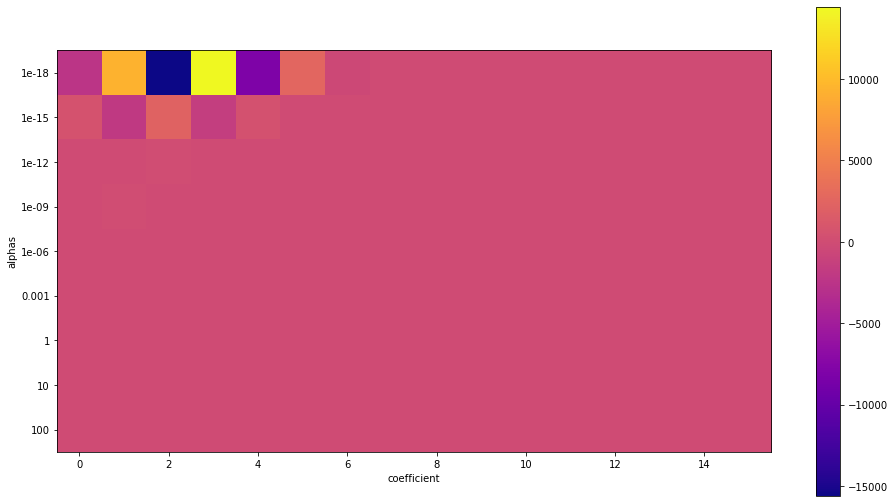

In [11]:
plt.figure(figsize=(16, 9))
cbar = plt.imshow(coeff_table_ridge.values.astype(float)[:, 1:], cmap=plt.get_cmap('plasma'))
plt.colorbar(cbar)
plt.xlabel('coefficient')
plt.ylabel('alphas')
plt.yticks(range(9), [1e-18, 1e-15, 1e-12, 1e-9, 1e-6, 1e-3, 1, 10, 100])
plt.show()

* Looking at the table of coefficients (weights), what do you observe?

Again we can see that only for small alpha the weights of the coefficients are rather big.

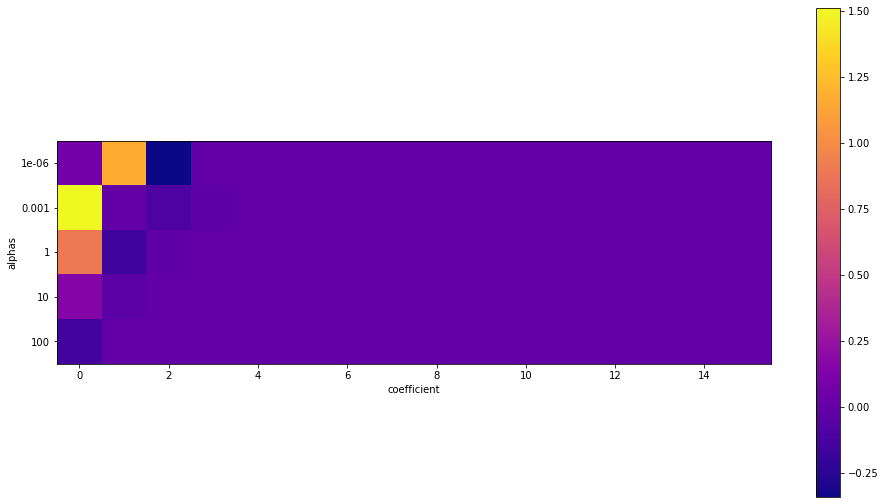

In [12]:
plt.figure(figsize=(16, 9))
cbar = plt.imshow(coeff_table_ridge.values.astype(float)[4:, 1:], cmap=plt.get_cmap('plasma'))
plt.colorbar(cbar)
plt.xlabel('coefficient')
plt.ylabel('alphas')
plt.yticks(range(5), [1e-6, 1e-3, 1, 10, 100])
plt.show()

For my preferred choice of alpha (`alpha ~= 1e-6`) all weights are relatively small.